In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [6]:
df_md = pd.read_csv("../data/pa/mosdata_dataset1903.csv")
df_mr = pd.read_csv("../data/pa/moscow_restoraunts.csv")

df_named_aspects = pd.read_csv("../data/pa/named_aspects.csv")
df_aspects = pd.read_csv("../data/stg/aspects/moscow_restoraunts.csv")

In [7]:
df_md.head()

,global_id,Number,Name,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,...,y_coord,StreetType,StreetName,HouseType,HouseName,BuildingType,BuildingName,Name_norm,OperatingCompany_count,Name_norm_count
0,2302690498,2,Кофе с собой Клуб выпускников МГУ,нет,NaN,кафе,Центральный административный округ,Басманный район,"Российская Федерация, город Москва, внутригоро...",['(929) 567-89-91'],...,55.765170,улица,садовая-черногрязская,дом,16-18,строение,1,кофе с собой клуб выпускников мгу,NaN,1
1,2302691541,4,Узбекское кафе,нет,NaN,кафе,Северный административный округ,район Аэропорт,"город Москва, Часовая улица, дом 16, строение 18",NaN,...,55.808552,улица,часовая,дом,16,строение,18,узбекское кафе,NaN,2
2,2302692852,5,Скрепка,нет,NaN,кафе,Центральный административный округ,Басманный район,"Российская Федерация, город Москва, внутригоро...",NaN,...,55.758780,улица,покровка,дом,3/7,строение,1г,скрепка,NaN,1
3,2302693205,6,Плов,нет,NaN,кафе,Северо-Западный административный округ,район Митино,"город Москва, Пятницкое шоссе, дом 18",['(495) 794-45-50'],...,55.844298,шоссе,пятницкое,дом,18,NaN,NaN,плов,NaN,4
4,2302693627,7,Кафе «LAZZAT»,нет,NaN,кафе,Южный административный округ,район Чертаново Южное,"Российская Федерация, город Москва, внутригоро...",['(925) 146-82-29'],...,55.578664,шоссе,варшавское,дом,170г,строение,22,lazzat,NaN,1


In [8]:
df_mr.head()

,url,dttm,fname,title,rating,cuisine,phone,city,address,x_coord,y_coord,avg_check,opening_hours,street_address,street_locality,global_id
0,https://www.moscow-restaurants.ru/restaurants/...,2022-09-16 13:46:00,chunk_60fea34fbfe231cf3e47ac5777f0ca213014f11c...,Бакинский бульвар на Чертановской,0,Азербайджанская кухня,(495) 940 93 98,Москва,"Балаклавский просп., 11а",37.593686,55.641696,1500-2500 ₽,круглосуточно,"Балаклавский просп., 11а",NaN,637547938
1,https://www.moscow-restaurants.ru/restaurants/...,2022-09-16 13:45:59,chunk_8dcb356425dcd7e9540536a27a259bde7325ef27...,Martinez Bar,0,Европейская кухня,(495) 760 81 92,Москва,"Сретенка, 1",37.630544,55.766532,1500-2500 ₽,пн-чт,"Сретенка, 1",NaN,637548684
2,https://www.moscow-restaurants.ru/restaurants/...,2022-09-16 13:45:57,chunk_298d227af3e2eb5e44b36343860bf70816bf0d66...,Марокко,0,Марокканская кухня,(495) 621 06 54,Москва,"Петровка, 17, стр. 2",37.615416,55.764121,<1500 ₽,пн-вс 10.00–23.00,"Петровка, 17, стр. 2",NaN,637421319
3,https://www.moscow-restaurants.ru/restaurants/...,2022-09-16 13:45:58,chunk_baf69ba05539dbdefe78ad7365d5e4112f34bd70...,Подъезд,0,Итальянская кухня,(495) 318 68 18,Москва,"Болотниковская, 21, стр. 2",37.597243,55.656737,<1500 ₽,пн-чт,"Болотниковская, 21, стр. 2",NaN,637498408
4,https://www.moscow-restaurants.ru/restaurants/...,2022-09-16 13:45:59,chunk_07cd7d34740e29c57386678b5eeadbb756a1c673...,Хаджурао,4,Индийская кухня,(499) 256-72-02,Москва,"Шмитовский пр., 14",37.550962,55.758418,1500-2500 ₽,пн-вс 12.00–23.00,"Шмитовский пр., 14",NaN,637464172


In [11]:
df_md.columns

Index(['global_id', 'Number', 'Name', 'IsNetObject', 'OperatingCompany',
       'TypeObject', 'AdmArea', 'District', 'Address', 'PublicPhone',
       'SeatsCount', 'SocialPrivileges', 'x_coord', 'y_coord', 'StreetType',
       'StreetName', 'HouseType', 'HouseName', 'BuildingType', 'BuildingName',
       'Name_norm', 'OperatingCompany_count', 'Name_norm_count'],
      dtype='object')

In [12]:
df_mr.columns

Index(['url', 'dttm', 'fname', 'title', 'rating', 'cuisine', 'phone', 'city',
       'address', 'x_coord', 'y_coord', 'avg_check', 'opening_hours',
       'street_address', 'street_locality', 'global_id'],
      dtype='object')

In [21]:
mr_columns = [
    "url", "cuisine", "phone", "avg_check", "global_id",
    "opening_hours"
]

md_columns = [
    "global_id", "Name", "Address", "SeatsCount",
    "SocialPrivileges", "x_coord", "y_coord"
]

In [49]:
df = df_md[md_columns].merge(df_mr[mr_columns], how="inner", on="global_id")

In [50]:
rating = df_aspects.groupby("global_id", as_index=False).rating.mean()

<AxesSubplot:>

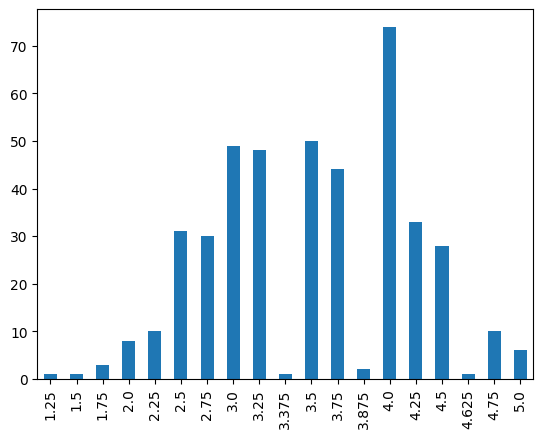

In [51]:
rating.rating.value_counts().sort_index().plot.bar()

In [52]:
rating["rating_scale"] = scale(rating.rating)

In [53]:
from scipy.stats import boxcox

In [60]:
rating["rating_boxcox"], lmbda = boxcox(rating.rating)
rating["rating_boxcox_scaled"] = scale(rating.rating_boxcox)
print(lmbda)

1.4178180371275673


<AxesSubplot:>

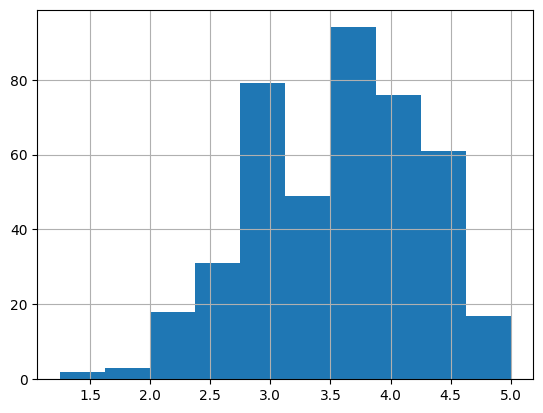

In [61]:
rating.rating.hist()

<AxesSubplot:>

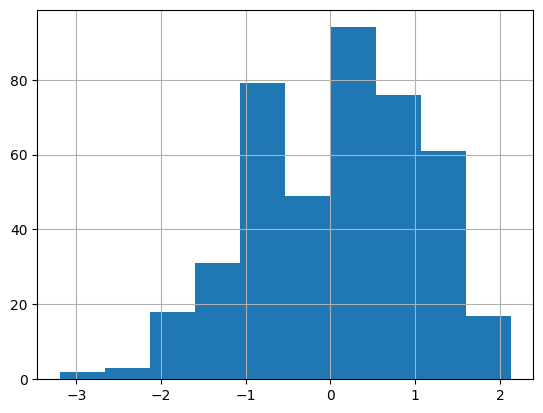

In [62]:
rating.rating_scale.hist()

<AxesSubplot:>

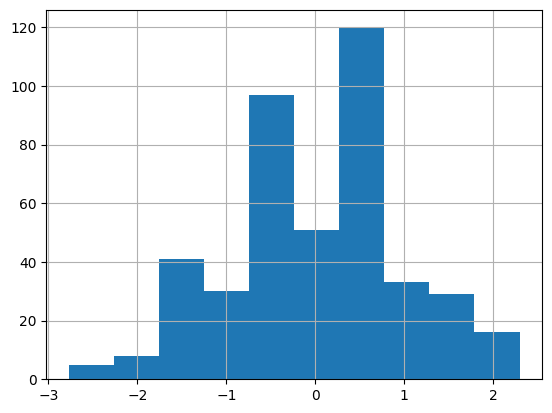

In [63]:
rating.rating_boxcox_scaled.hist()

In [64]:
df = df.merge(rating[["global_id", "rating_boxcox_scaled"]], how="left", on="global_id")

In [66]:
df.rating_boxcox_scaled.isna().value_counts(dropna=False)

True     531
False    446
Name: rating_boxcox_scaled, dtype: int64

In [68]:
df.rating_boxcox_scaled = df.rating_boxcox_scaled.fillna(0)

In [69]:
df_named_aspects

,global_id,aspect,value,sentiment,count
0,637378788,dish,бургер,0.014207,5
1,637378788,dish,котлета,0.028585,8
2,637378788,dish,креветка,0.005324,8
3,637378788,dish,пиво,0.020495,2
4,637378788,dish,рыба,0.004578,2
...,...,...,...,...,...
2417,2380098536,dish,суп,0.002619,8
2418,2381688980,dish,бургер,0.034733,6
2419,2381688980,dish,котлета,-0.033366,4
2420,2381688980,dish,стейк,0.003437,2


In [73]:
df_aspects = df_aspects.assign(fname="fname")

In [74]:
rating = df_aspects.groupby(["global_id", "fname"], as_index=False).rating.mean()

In [78]:
from scipy.stats import boxcox
from sklearn.preprocessing import scale

from pandas import Series
from numpy import ndarray
from typing import Union

def boxcox_normalize(
    data: Union[Series, ndarray], add_one: bool = False
) -> Union[Series, ndarray]:
    if add_one:
        bx, _ = boxcox(data + 1)
    else:
        bx, _ = boxcox(data)
    bx_scaled = scale(bx)

    if isinstance(data, Series):
        return Series(bx_scaled, data.index, name=data.name)
    else:
        return bx_scaled

In [81]:
rating["rating_boxcox_scaled"] = rating.groupby(["fname"]).rating.apply(boxcox_normalize)

<AxesSubplot:>

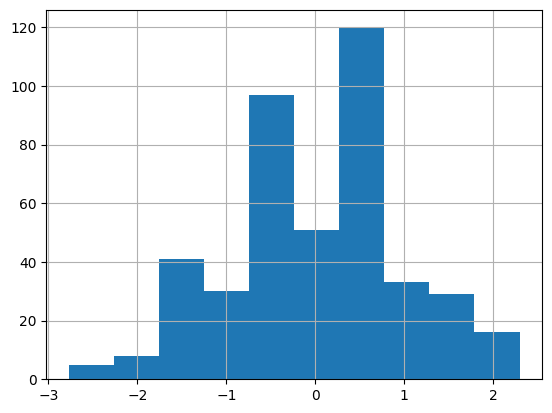

In [84]:
rating["rating_boxcox_scaled"].hist()

In [85]:
rating_mean = rating.groupby("global_id", as_index=False).rating.mean()

In [86]:
rating_mean

,global_id,rating
0,637378788,2.750
1,637378925,2.500
2,637381780,3.875
3,637382252,4.000
4,637382410,4.500
...,...,...
425,2375784319,2.500
426,2375784324,4.500
427,2375784440,4.750
428,2380098536,1.250
